In [1]:
# https://towardsdatascience.com/apply-function-to-pandas-dataframe-rows-76df74165ee4

In [3]:
# https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html#skfuzzy.gaussmf

In [1]:
! pip install plotly_express
# Para usar as funções de visualização
# Não há necessidade de instalar novamente, uma vez feita a instalação. A importação é feita cada vez para uso.

In [2]:
import random
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_selection import chi2
%matplotlib inline
import pandas_profiling

In [3]:
import plotly_express as px

In [4]:
qws = pd.read_csv("qwsA.csv")
# carregamento do dataset

FileNotFoundError: [Errno 2] File b'qwsA.csv' does not exist: b'qwsA.csv'

In [ ]:
qws = pd.DataFrame(qws)                  

In [ ]:
qws.head(3)

In [ ]:
qws.tail(2)

In [ ]:
qws.info()

In [ ]:
round(qws.describe(),2)

## Fuzzy Logic

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# variáveis de entrada ou antecedentes, que influenciam a avaliação do serviço
Availability = ctrl.Antecedent(np.arange(0.1, 101.1, .01), 'availability')
Reliability = ctrl.Antecedent(np.arange(5.9,98.7, .5), 'reliability')
Response_Time = ctrl.Antecedent(np.arange(45,30782, 1), 'response_time')
Throughput = ctrl.Antecedent(np.arange(0.1,30, .1), 'throughput')
Sucessability = ctrl.Antecedent(np.arange(7,100,1), 'sucessability')
Compliance = ctrl.Antecedent(np.arange(67,101, 1), 'compliance')
Best_Practice = ctrl.Antecedent(np.arange(58,96,1), 'best_practice')
Lattency = ctrl.Antecedent(np.arange(31.5,30782,.5), 'lattency')
Documentation = ctrl.Antecedent(np.arange(1,98,.5), 'documentation')

# variável de saída ou consequente, avaliação do serviço
WsRF = ctrl.Consequent(np.arange(30, 101, .25), 'WsRF')

# DEFINIÇÕES DAS FUNÇÕES DE PERTINÊNCIA -- sobre todas as variáveis: entrada & saída
# Availability
Availability['baixa'] = fuzz.trimf(Availability.universe,[0,0,35])
Availability['media'] = fuzz.trimf(Availability.universe,[25,50,75])
Availability['alta'] = fuzz.trimf(Availability.universe,[60,100,100])

# Reliability
Reliability['baixo'] = fuzz.trimf(Reliability.universe,[5.9,5.9,50])
Reliability['medio'] = fuzz.trimf(Reliability.universe,[20,50,75])
Reliability['alto'] = fuzz.trimf(Reliability.universe,[50,98.7,98.7])

Response_Time['baixo'] = fuzz.trimf(Response_Time.universe,[45,45,7500])
Response_Time['medio'] = fuzz.trimf(Response_Time.universe,[5000,15000,22500])
Response_Time['alto'] = fuzz.trimf(Response_Time.universe, [15000,30782,30782])

Throughput['baixo'] = fuzz.trimf(Throughput.universe,[0.1,0.1,7.5])
Throughput['medio'] = fuzz.trimf(Throughput.universe,[5,15,22.5])
Throughput['alto'] = fuzz.trimf(Throughput.universe,[15,30,30])

Sucessability['baixo'] = fuzz.trimf(Sucessability.universe,[7,7,25])
Sucessability['medio'] = fuzz.trimf(Sucessability.universe,[18,50,75])
Sucessability['alto'] = fuzz.trimf(Sucessability.universe,[50,100,100])

Compliance['baixo'] = fuzz.trimf(Compliance.universe,[67,67,74])
Compliance['medio'] = fuzz.trimf(Compliance.universe,[70,82,91])
Compliance['alto'] = fuzz.trimf(Compliance.universe,[82,100,100])

Best_Practice['baixo'] = fuzz.trimf(Best_Practice.universe,[58,58,67])
Best_Practice['medio'] = fuzz.trimf(Best_Practice.universe,[60,77,86])
Best_Practice['alto'] = fuzz.trimf(Best_Practice.universe,[77,96,96])

Lattency['baixo'] = fuzz.trimf(Lattency.universe,[31.5,31.5,7500])
Lattency['medio'] = fuzz.trimf(Lattency.universe,[5000,15000,32500])
Lattency['alto'] = fuzz.trimf(Lattency.universe,[15000,30782,30782])

Documentation['baixa'] = fuzz.trimf(Documentation.universe,[0,0,25])
Documentation['media'] = fuzz.trimf(Documentation.universe,[20,50,75])
Documentation['alta'] = fuzz.trimf(Documentation.universe,[60,98,98])

# WsRF
WsRF['ruim'] = fuzz.trimf(WsRF.universe,[30,47,65])
WsRF['medio'] = fuzz.trimf(WsRF.universe,[47,65,82])
WsRF['bom'] = fuzz.trimf(WsRF.universe,[65,101,101])

# VISUALIZAÇÃO DAS FUNÇÕES DE PERTINÊNCIA
Availability.view()
Reliability.view()
Response_Time.view()
Throughput.view()
Sucessability.view()
Compliance.view()
Best_Practice.view()
Lattency.view()
Documentation.view()
WsRF.view()

# regra 1 - 
regra1 = ctrl.Rule(Availability['baixa']& Reliability['baixo'] & Response_Time['alto'] & Throughput['baixo'] & Sucessability['baixo'] & 
Compliance['baixo'] & Best_Practice['baixo'] & Lattency['alto'] & Documentation['baixa'], WsRF['ruim'])

# regra 2 - 
regra2 = ctrl.Rule(Availability['media'] | Reliability['medio'] & Response_Time['medio'] & Throughput['medio'] & Sucessability['medio'] &
Compliance['medio'] & Best_Practice['medio'] & Lattency['medio'] & Documentation['media'], WsRF['medio'])

# regra 3 - 
regra3 = ctrl.Rule(Availability['alta'] | Reliability['alto'] & Response_Time['baixo'] & Throughput['alto'] & Sucessability['medio'] &
Compliance['alto'] & Best_Practice['alto'] & Lattency['baixo'] & Documentation['alta'], WsRF['bom'])

regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)
# passa as predições dos modelos para suas respectivas variáveis de entrada
# caso com valores médios
engine.input['availability'] = 84.7
engine.input['reliability'] = 64
engine.input['response_time'] = 840
engine.input['throughput'] = 7
engine.input['sucessability'] = 64
engine.input['compliance'] = 84
engine.input['best_practice'] = 81
engine.input['lattency'] = 763
engine.input['documentation'] = 47

# calcula a saída do sistema de controle fuzzy
engine.compute()

# retorna o valor crisp e o gráfico mostrando-o
e1 = 66.65
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

87.347
-0.127


C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



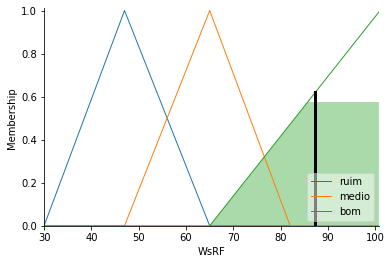

In [29]:
regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)
# valor inicial
engine.input['availability'] = 83
engine.input['reliability'] = 97.4
engine.input['response_time'] = 45
engine.input['throughput'] = 83
engine.input['sucessability'] = 50
engine.input['compliance'] = 89
engine.input['best_practice'] = 91
engine.input['lattency'] = 43
engine.input['documentation'] = 58

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 100
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

88.833
-0.045


C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



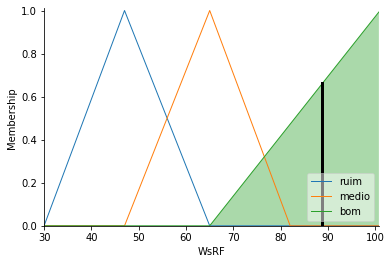

In [30]:
regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)
# segundo valor
engine.input['availability'] = 100
engine.input['reliability'] = 85.5
engine.input['response_time'] = 71.7
engine.input['throughput'] = 14.6
engine.input['sucessability'] = 88
engine.input['compliance'] = 78
engine.input['best_practice'] = 80
engine.input['lattency'] = 64.4
engine.input['documentation'] = 86

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 93
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

88.833
1.776


C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



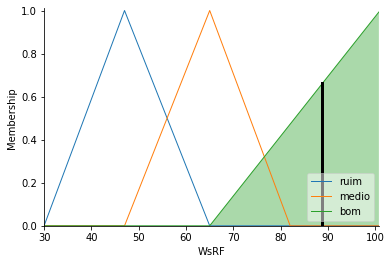

In [35]:
regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)
# terceiro valor
engine.input['availability'] = 100
engine.input['reliability'] = 88
engine.input['response_time'] = 117
engine.input['throughput'] = 23.4
engine.input['sucessability'] = 83
engine.input['compliance'] = 100
engine.input['best_practice'] = 87
engine.input['lattency'] = 111
engine.input['documentation'] = 59

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 32
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

64.529
1.017


C:\Users\aferr\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



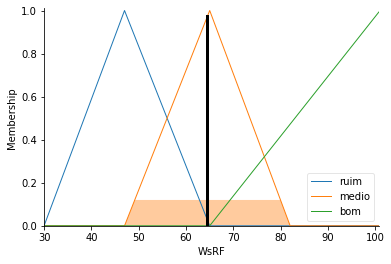

In [31]:
regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)
# valor penúltimo
engine.input['availability'] = 28
engine.input['reliability'] = 30
engine.input['response_time'] = 6963
engine.input['throughput'] = 0.5
engine.input['sucessability'] = 21
engine.input['compliance'] = 78
engine.input['best_practice'] = 69
engine.input['lattency'] = 6915
engine.input['documentation'] = 5

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 32
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

In [34]:
regra_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
engine = ctrl.ControlSystemSimulation(regra_ctrl)
# valor último
engine.input['availability'] = 16
engine.input['reliability'] = 12.5
engine.input['response_time'] = 1680.16
engine.input['throughput'] = 2.0
engine.input['sucessability'] = 7
engine.input['compliance'] = 89
engine.input['best_practice'] = 72
engine.input['lattency'] = 1667.2
engine.input['documentation'] = 11

# calcula a saída do sistema de controle fuzzy
engine.compute()

e1 = 30
e = ((engine.output['WsRF']-e1)/e1)
print(round(engine.output['WsRF'],3))
print(round(e,3))
WsRF.view(sim=engine)

ValueError: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.